# Problem 2: Clustering

Importing Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

Building Clustering Model

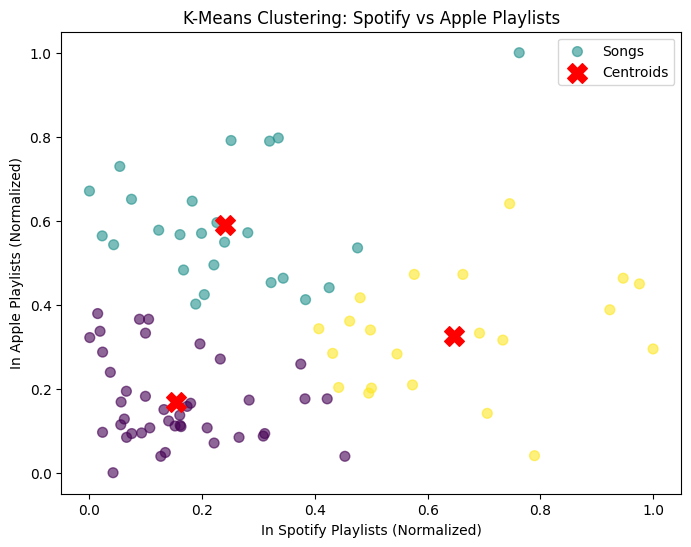

In [2]:
# Import dataset
df = pd.read_csv("spotify-top-songs.csv")

# Extract numeric columns
numeric_columns = df.select_dtypes(include='number').columns.tolist()

# Normalize the data
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Create the variable 'X'
X = df[numeric_columns]

# Create the variable 'X_simple'
X_simple = X[['in_spotify_playlists','in_apple_playlists']]

# Create and train K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_simple)

# Predict the clusters
y_kmeans = kmeans.predict(X_simple)

# Extract the centroids
centroids = kmeans.cluster_centers_

# Plotting data
plt.figure(figsize=(8, 6))

# Scatter plot of the data points colored by their predicted cluster (y_kmeans)
plt.scatter(X_simple['in_spotify_playlists'], X_simple['in_apple_playlists'], 
            c=y_kmeans, cmap='viridis', s=50, alpha=0.6, label='Songs')

# Plot the centroids with a different color and marker
# centroids[:, 0] is the x-coordinate (Spotify), centroids[:, 1] is the y-coordinate (Apple)
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c='red', s=200, marker='X', label='Centroids')

plt.title('K-Means Clustering: Spotify vs Apple Playlists')
plt.xlabel('In Spotify Playlists (Normalized)')
plt.ylabel('In Apple Playlists (Normalized)')
plt.legend()
plt.show()

Creating calculate_sse() Function

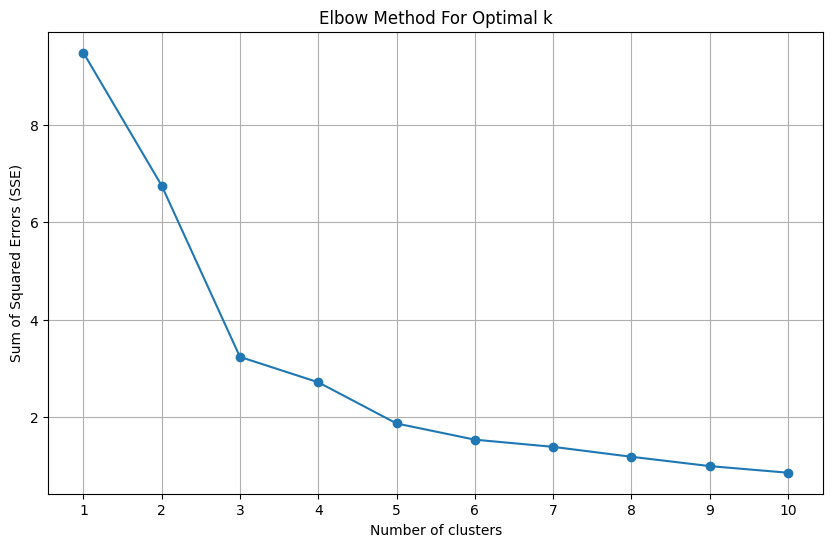

In [3]:
def calculate_sse(X, max_num_clusters):
    sse = []
    for k in range(1, max_num_clusters + 1):
        model = KMeans(n_clusters=k, random_state=42)
        model.fit(X)
        sse.append(model.inertia_)
    return sse
    
# Run the function with X_simple and max_num_clusters = 10
max_num_clusters = 10
sse = calculate_sse(X_simple, max_num_clusters)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_num_clusters + 1), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(range(1, max_num_clusters + 1))
plt.grid(True)
plt.show()

DBSCAN Model

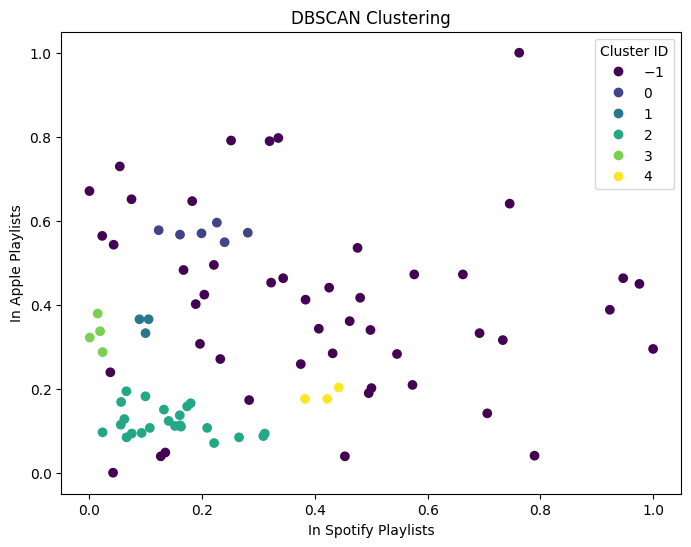

In [4]:
# Intialize DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=3)

# Fit model to X_simple
clustering = dbscan.fit(X_simple)

# Assign cluster values
y_dbscan = clustering.labels_

# Plotting data
plt.figure(figsize=(8, 6))
scatter_plot = plt.scatter(X_simple['in_spotify_playlists'], X_simple['in_apple_playlists'], c=y_dbscan)

plt.title('DBSCAN Clustering')
plt.xlabel('In Spotify Playlists')
plt.ylabel('In Apple Playlists')
plt.legend(*scatter_plot.legend_elements(), title="Cluster ID")
plt.show()

It seems like the eps is too small because these clusters are not great and there out lots of outliers